# HDF data analysis

In [9]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

HDF_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'HDF':
        HDF_st.append(st[i]) 

In [10]:
HDF_st

3 Trace(s) in Stream:
CN.ELFO2..HDF | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.ELFO1..HDF | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
CN.ELFO3..HDF | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples

In [11]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


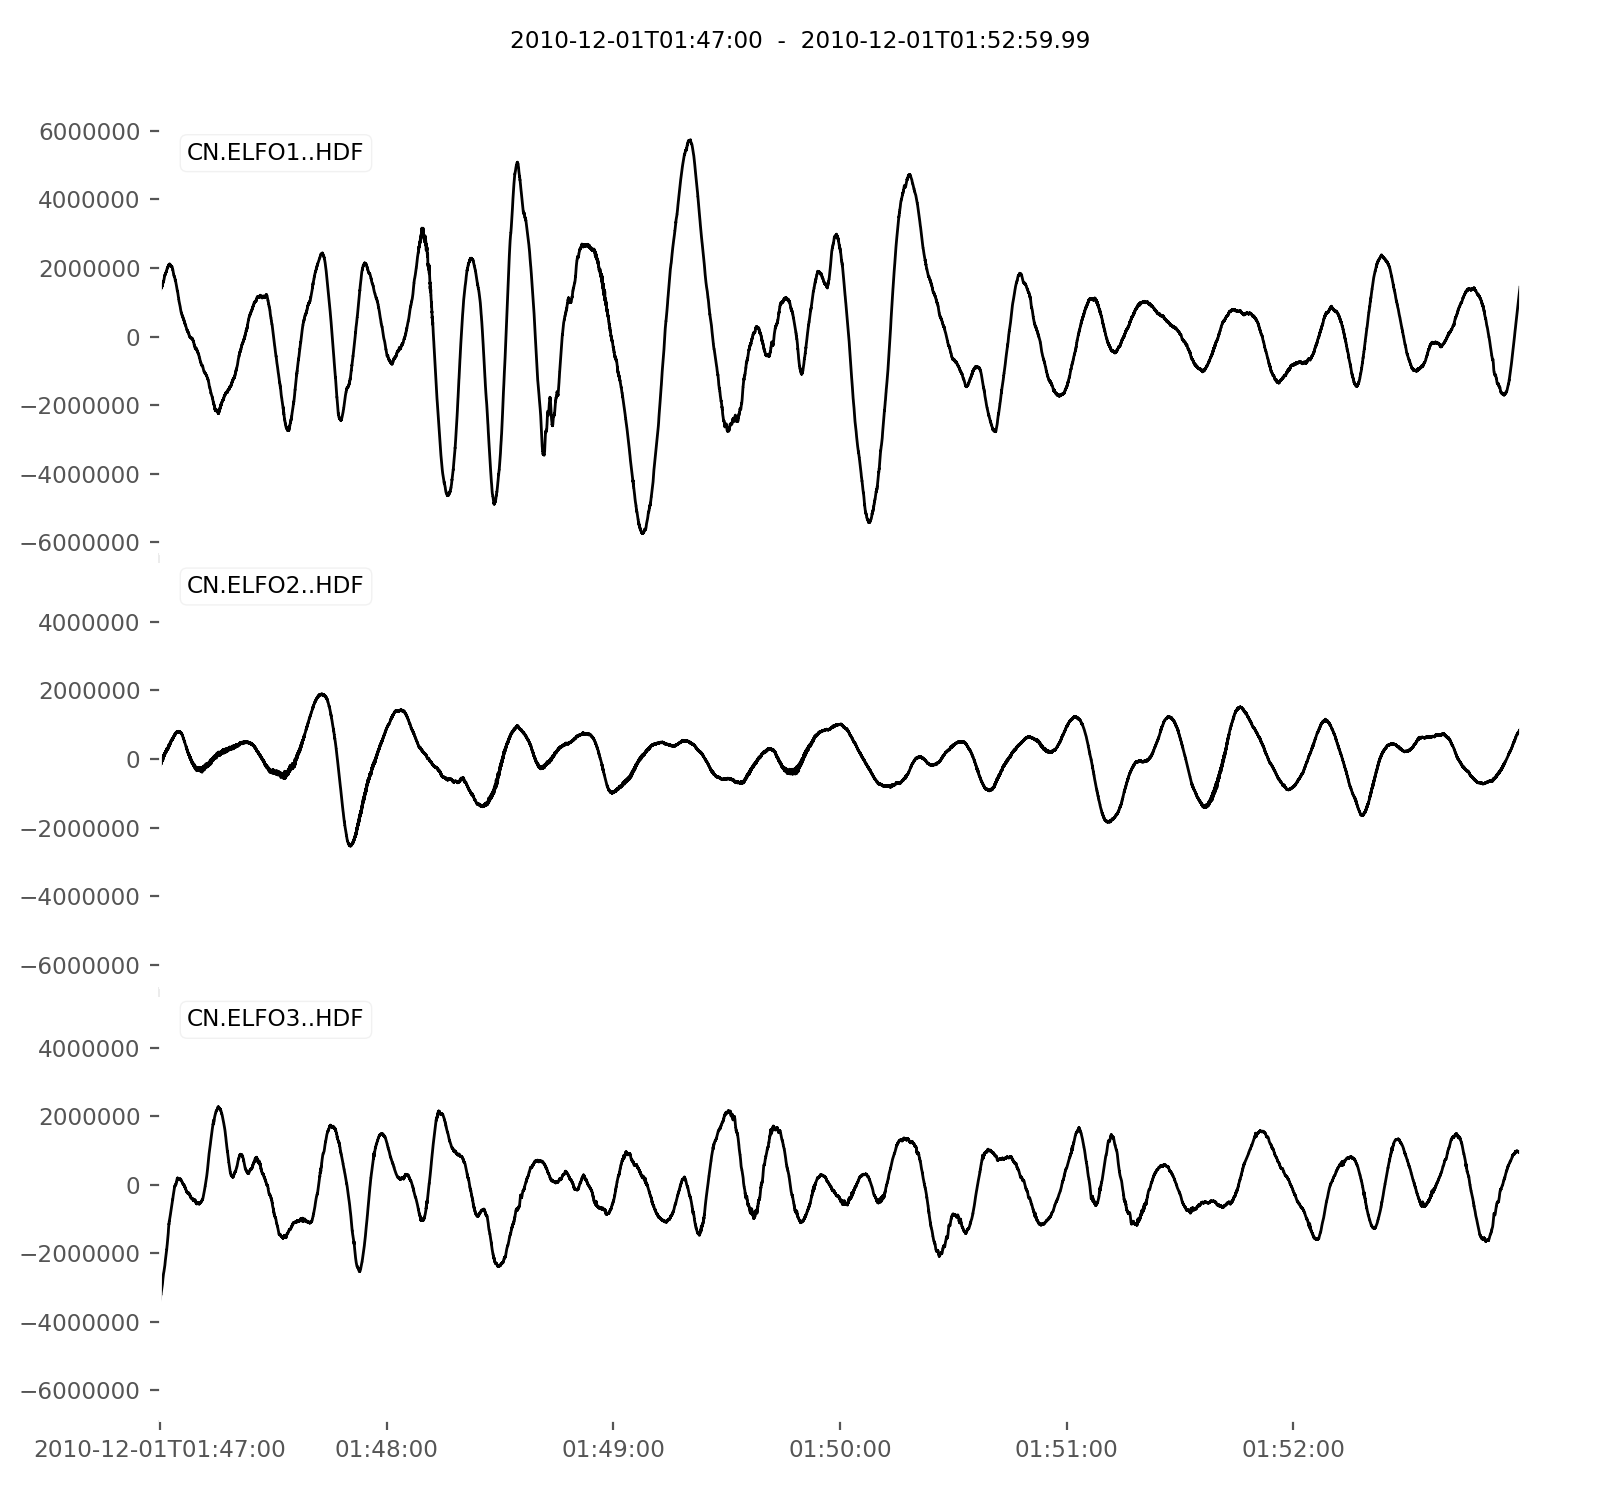

In [12]:
HDF_st[:].plot()

In [7]:
print("Station: ", [tr.stats['station'] for tr in HDF_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in HDF_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in HDF_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in HDF_st]))

Station:  ['ELFO2', 'ELFO1', 'ELFO3']
Sampling Rate:  [100.0, 100.0, 100.0]
(delta, npts):  [(0.01, 36000), (0.01, 36000), (0.01, 36000)]
(start time, end time):  [[UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 990000)]]


Every trace of band code 'E' have sampling rate of 100Hz. This can also be shown with the consistent delta value of 0.01. They were also taken during the same time interval (2010/12/1 1:47:00 - 1:52:59.99)

In [13]:
HDF_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in HDF_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in HDF_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
19782.6915833 		 742710.262049 		 (-2538077, 1896857)
599.581333333 		 1954895.94306 		 (-5748170, 5740927)
-2113.21363889 		 959252.331675 		 (-3359581, 2272471)
